In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

In [2]:
train_df = pd.read_csv("data/train.csv")
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test_df = pd.read_csv("data/test.csv")
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


## Initial EDA

We can notice that there are plenty of NaN values in all columns. Since we don't have a lot of information about this dataset, we'll explore the data to see what is the best way to fill these values in each column. 

In [6]:
df = pd.concat([train_df.drop("Transported", axis = 1), test_df], ignore_index=True)
df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale
12969,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Lilace Leonzaley


In [7]:
# Lets break the Cabin Information in Three
def treatCabin(df): 
    def get_from_cabin(x, i):
        if pd.isna(x):
            return np.nan

        else:
            return x.split("/")[i] 
    
    df["Deck"]  = df["Cabin"].apply(lambda x:get_from_cabin(x, 0))
    df["Num"]   = df["Cabin"].apply(lambda x:get_from_cabin(x, 1))
    df["Num"]   = pd.to_numeric(df["Num"])
    df["Side"]  = df["Cabin"].apply(lambda x:get_from_cabin(x, 2))

    return df

df = treatCabin(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Deck          12671 non-null  object 
 14  Num           12671 non-null  float64
 15  Side          12671 non-null  object 
dtypes: float64(7), object(9)
memory usage: 1.6+ MB


In [97]:
def violinplot_num_cat(df, num, cat, hue = None):
    fig, ax = plt.subplots(figsize = (11, 6))

    if hue:
        sns.violinplot(data = df, x = cat, y = num, ax = ax, hue = hue, palette = "rocket_r")
    else : 
        sns.violinplot(data = df, x = cat, y = num, ax = ax)
    ax.set_title("Distribution of " + num + " according to "+ cat)
    return

def violinplot_expenses(df, cat):
    fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize = (20, 10))

    expenses = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
    df[expenses] = df[expenses].astype(float)
    df[cat] = df[cat].astype(object)
    sns.violinplot(data = df, x = cat, y = "RoomService", ax = ax[0][0])
    ax[0][0].set_title("Distribution for RoomService according to "+cat)
    
    sns.violinplot(data = df, x = cat, y = "FoodCourt", ax = ax[0][1])
    ax[0][1].set_title("Distribution for FoodCourt according to "+cat) 
    
    sns.violinplot(data = df, x = cat, y = "ShoppingMall", ax = ax[0][2])
    ax[0][2].set_title("Distribution for ShoppingMall according to "+cat)
    
    sns.violinplot(data = df, x = cat, y = "Spa", ax = ax[1][0])
    ax[1][0].set_title("Distribution for Spa according to "+cat)

    sns.violinplot(data = df, x = cat, y = "VRDeck", ax = ax[1][1])
    ax[1][1].set_title("Distribution for VRDeck according to "+cat)
    
    ax[1][2].set_axis_off()

    return

def boxplot_num_cat(df, num, cat, hue = None):
    fig, ax = plt.subplots(figsize = (11, 6))

    if hue:
        sns.boxplot(data = df, x = cat, y = num, ax = ax, hue = hue, palette="rocket_r")
    else : 
        sns.boxplot(data = df, x = cat, y = num, ax = ax)
    ax.set_title("Distribution of " + num + " according to "+ cat)
    return

def bar_chart_two_categories(df, column, hue):
    fig, ax = plt.subplots(figsize = (11,6)) 
    sns.countplot(data = df, x=column, hue = hue, palette = "rocket_r", ax=ax)
    ax.set_title("Number of observations for "+ column + " separated according to "+ hue)
    return 

def kdeplot_num_cat(df, column, hue, palette = "rocket_r"):
    fig, ax = plt.subplots(figsize = (11,6))
    
    sns.kdeplot(data = df, x=column, ax = ax, hue = hue, palette=palette, common_norm=False)
    
    ax.set_title("Distribution of "+ column + " separated according to "+ hue)
    return 
    


Text(0.5, 1.0, 'Number of observations for each HomePlanet')

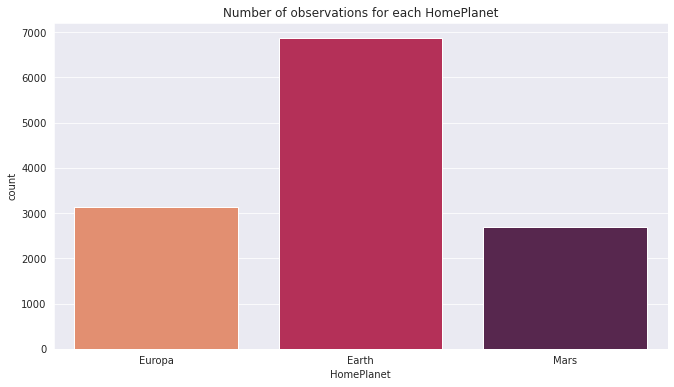

In [9]:
fig, ax = plt.subplots(figsize = (11,6))
ax = sns.countplot(data = df, x = "HomePlanet", palette="rocket_r")
ax.set_title("Number of observations for each HomePlanet")

We can see that most people aboard the spaceship are from Earth. Let's search for some relationship between HomePlanet and other features:

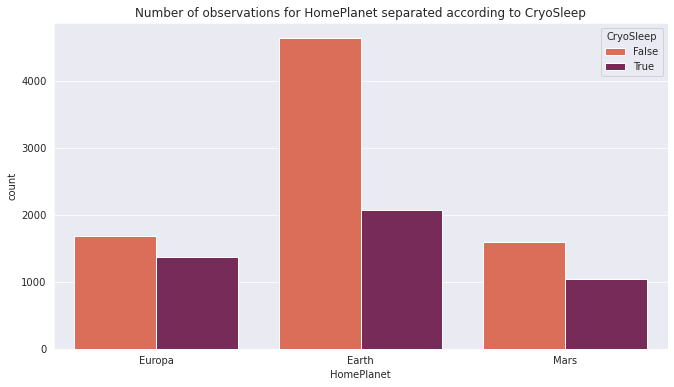

In [10]:
bar_chart_two_categories(df, "HomePlanet", "CryoSleep")

We can see that the Earth has the lowest proportion of people that are going to be put on CryoSleep. Meanwhile, Mars and Europa have similar numbers, although Europa's numbers are slightly higher.

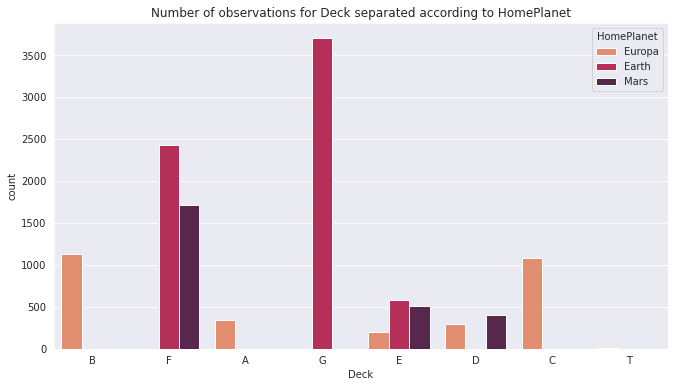

In [11]:
bar_chart_two_categories(df, "Deck", "HomePlanet")

From this graph we can notice that the Deck of a person depends on it's country. So just replacing NaN values with the mode for these two columns won't be a good option, because it can distort the data and atenuate this relationship.


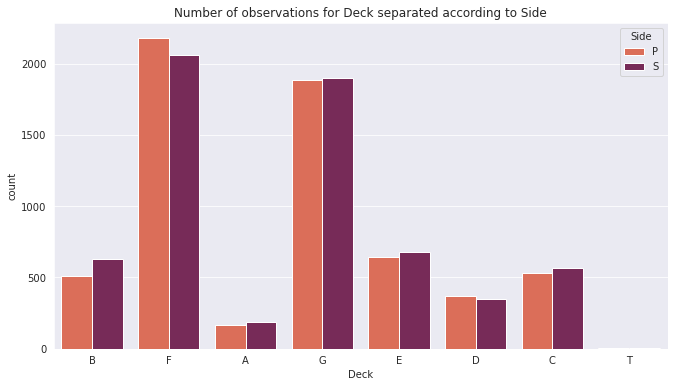

In [12]:
bar_chart_two_categories(df, "Deck", "Side")

This graph shows that the Side doesn't really depends on the Deck category. 

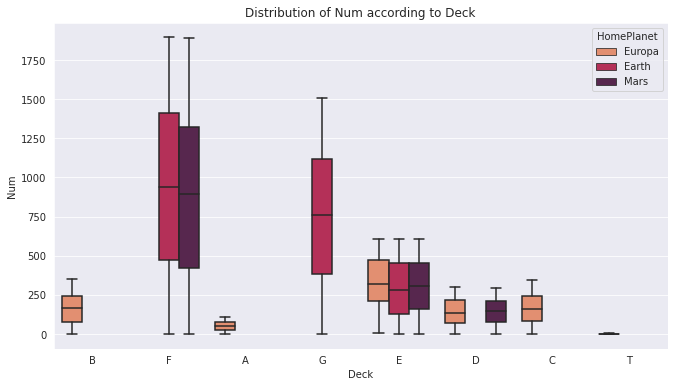

In [13]:
boxplot_num_cat(df, "Num", "Deck", "HomePlanet")

From this graph we can see that the range of numbers from the Cabin depends on the Deck. However, for two people in the same deck, this number doesn't depend on which country the person is from.   

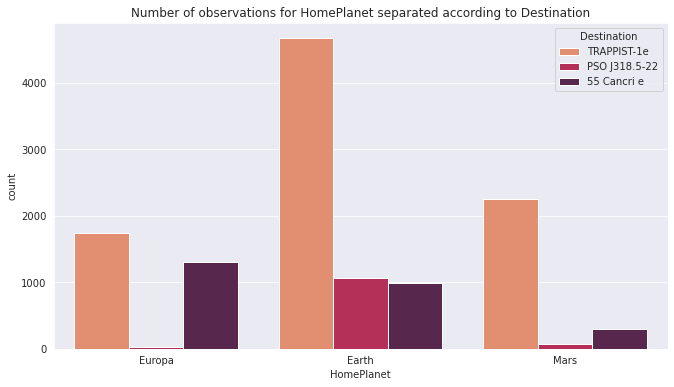

In [14]:
bar_chart_two_categories(df, "HomePlanet", "Destination")

Almost no one from Europa and Mars are going to PSO J318.5-22. The Destination with the higher number of person is TRAPPIST-1e for all three Home Planets.

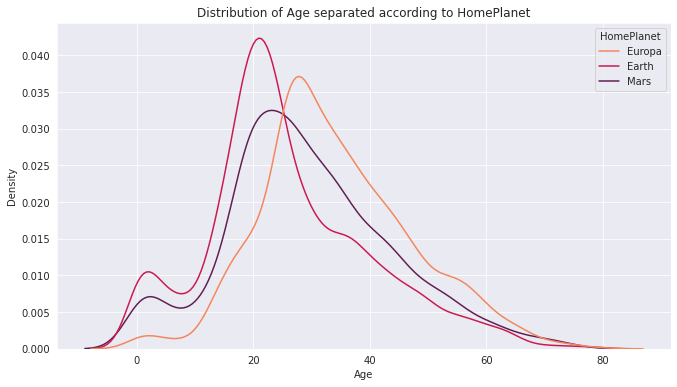

In [15]:
kdeplot_num_cat(df, "Age", "HomePlanet")

This graph shows the distribution of Age for each HomePlanet. We can see that Earth has the highest concentration of Children (<13 years) and it a very high concentration of young adults (around 20 year). In the other hand, Europa has a very low concentration of children, which and a triangular shaped distribution, with its peak being around 25 years. Mars, however, is very similar to earth, but its distribution is more spaced for higher ages.   

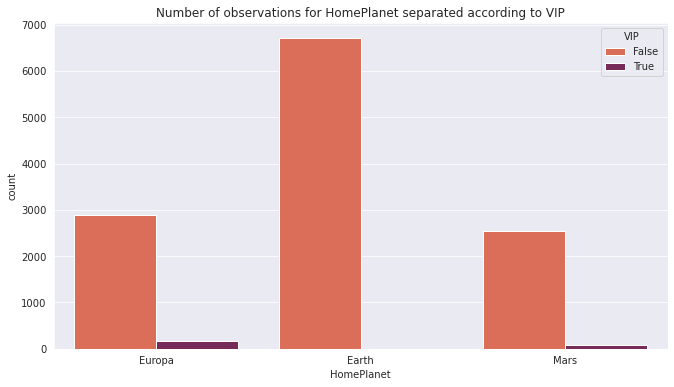

In [16]:
bar_chart_two_categories(df, "HomePlanet", "VIP")

It's very clear that there is a low number of VIP's. It's interesting to notice that none of the VIPs are from Earth, yet it is the planet with the highest number os passengers. 

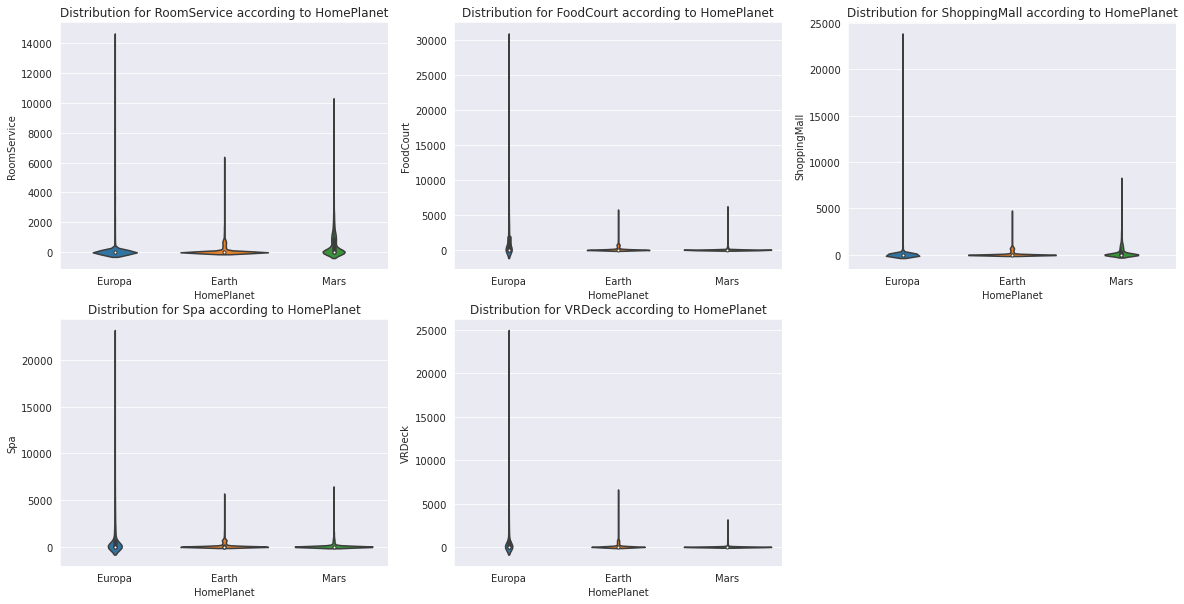

In [17]:
violinplot_expenses(df, "HomePlanet")

Overall, almost every expense is composed by a very large number of zeroes. In average, Europe and Mars are the Planets which have the higher expenses.  

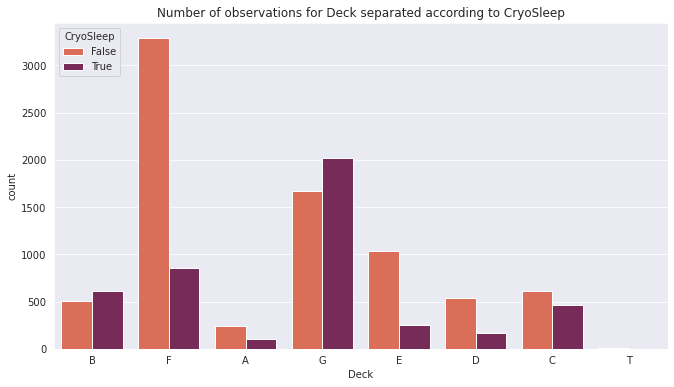

In [18]:
bar_chart_two_categories(df, "Deck", "CryoSleep")

We have already seen that the HomePlanet and The CryoSleep columns were related. So it was expected that the CryoSleep column is also related with the Deck category. But what is new is that: in Decks which are composed by only one planet (for example B, A and C have only passengers from Europa) the proportion of CryoSleep changes depending on the category.

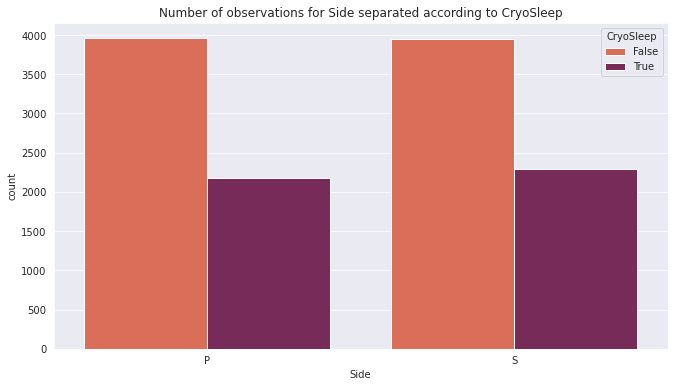

In [19]:
bar_chart_two_categories(df, "Side", "CryoSleep")

We can see that CryoSleep and the Cabin Side aren't related.

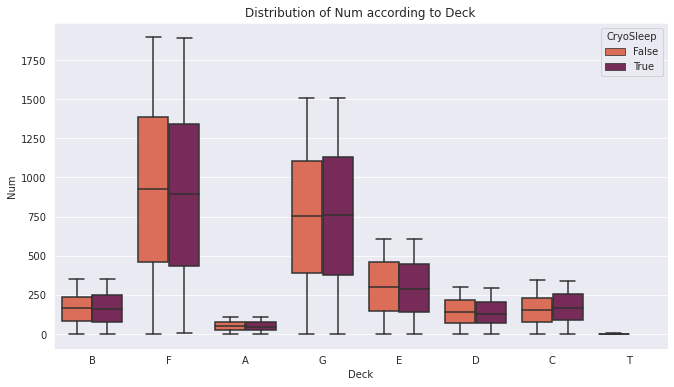

In [20]:
boxplot_num_cat(df, "Num", "Deck", "CryoSleep")

Similarly to the previous graph, this one shows that the number of the cabin does is not related to wheter the person in that cabin is in CryoSleep.

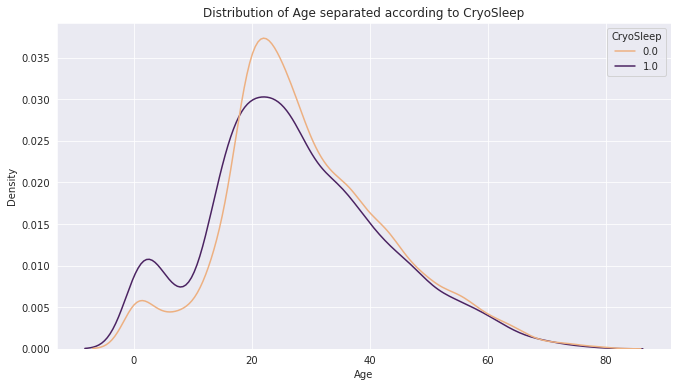

In [21]:
kdeplot_num_cat(df, "Age", "CryoSleep", palette = "flare")

This graph points out that the Age distribution for passengers in CryoSleep seems to be more well distributed for adults, although it has a higher concentration for children.

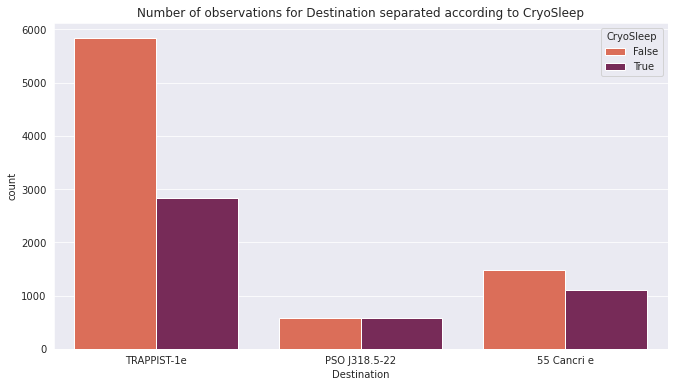

In [22]:
bar_chart_two_categories(df, "Destination", "CryoSleep")

We can see that the Destination of a passenger is related to wheter it is on CryoSleep. Approximately half of the passengers going to PSO J318.5-22 are in CryoSleep. Meanwhile, for TRAPPIST-1e this proportion is about one third. 

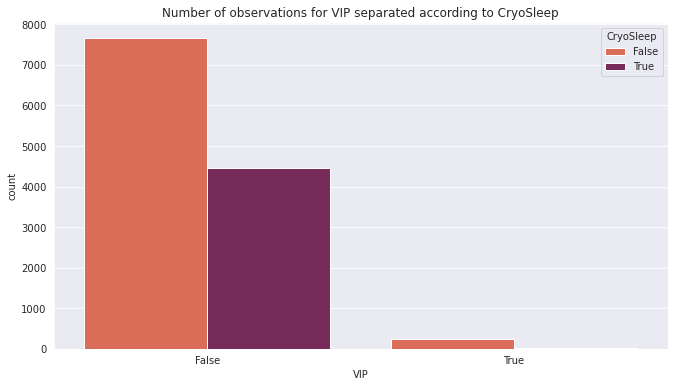

In [23]:
bar_chart_two_categories(df,"VIP", "CryoSleep")

It's interesting to note that none of the VIP passengers are in CryoSleep

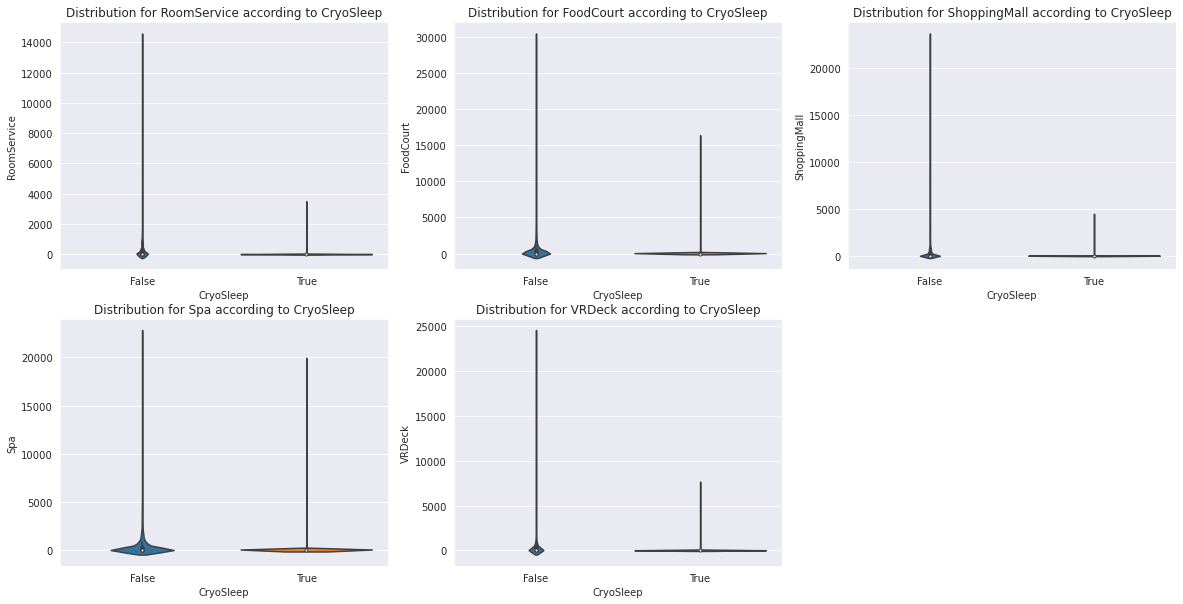

In [90]:
violinplot_expenses(df, "CryoSleep")

We can see that people who are in CryoSleep don't have any expenses. This is expected since they don't leave their cabins. However, even for people who are not in CryoSleep, the expense distribution shows a very large concentration around the zero value.

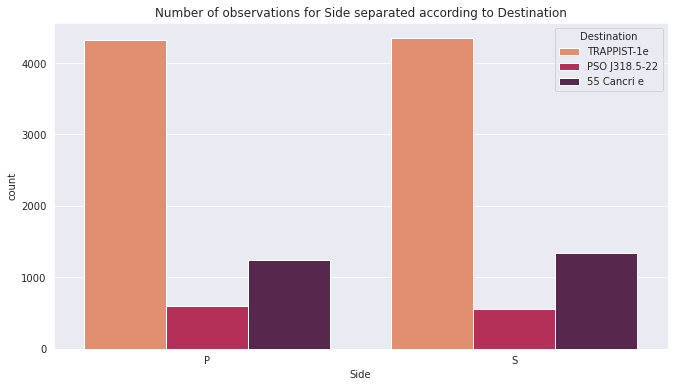

In [25]:
bar_chart_two_categories(df, "Side", "Destination")

We can see that the destination is not related with the Side of the cabin

## Filling NaN values
We have noticed that aplying common filling techniques might distort our data. So for the categorical data we'll use the InteractiveImputer from SciPy. For the numerical data we'll use different techniques. But first, let's drop some columns that we won't use from our dataframe.

In [26]:
df.drop(["Name", "Cabin"], axis = 1, inplace=True)

### Categorical Data

In [27]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from collections import defaultdict

In [28]:
categorical = ["HomePlanet", "CryoSleep", "Deck", "Side", "Destination", "VIP"]

d = defaultdict(LabelEncoder)
df[categorical] = df[categorical].apply(lambda series: pd.Series(
                                        d[series.name].fit_transform(series[series.notnull()]),
                                        index=series[series.notnull()].index))

In [29]:
imputer = IterativeImputer(estimator=RandomForestClassifier(), 
                            initial_strategy='most_frequent',
                            max_iter=10, random_state=0)

df[categorical] = imputer.fit_transform(df[categorical])

/home/degelo/anaconda3/envs/kaggle_competition/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [30]:
df[categorical] = df[categorical].apply(lambda series: pd.Series(d[series.name].inverse_transform(series[series.notnull()].astype(int)), 
                                                index=series[series.notnull()].index))

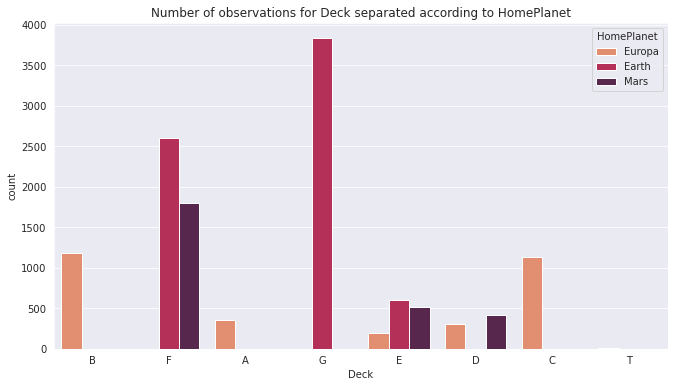

In [31]:
bar_chart_two_categories(df, "Deck", "HomePlanet")

As we can see, the imputer didn't affect the distribution of the data.

### Numerical data

#### Age and Num

In [32]:
numerical = ["Age", "Num"]
df[categorical] = df[categorical].apply(lambda series: pd.Series(
                                        d[series.name].transform(series[series.notnull()]),
                                        index=series[series.notnull()].index))

In [33]:
imputer = IterativeImputer(estimator=RandomForestRegressor(), 
                            initial_strategy='median',
                            max_iter=10, random_state=0)

df[categorical+numerical] = imputer.fit_transform(df[categorical+numerical])

/home/degelo/anaconda3/envs/kaggle_competition/lib/python3.9/site-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [38]:
df[categorical] = df[categorical].apply(lambda series: pd.Series(d[series.name].inverse_transform(series[series.notnull()].astype(int)), 
                                                index=series[series.notnull()].index))

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12970 non-null  object 
 2   CryoSleep     12970 non-null  object 
 3   Destination   12970 non-null  object 
 4   Age           12970 non-null  float64
 5   VIP           12970 non-null  object 
 6   RoomService   12970 non-null  float64
 7   FoodCourt     12970 non-null  float64
 8   ShoppingMall  12970 non-null  float64
 9   Spa           12970 non-null  float64
 10  VRDeck        12970 non-null  float64
 11  Deck          12970 non-null  object 
 12  Num           12970 non-null  float64
 13  Side          12970 non-null  object 
dtypes: float64(7), object(7)
memory usage: 1.4+ MB


#### Expenses (RoomService, FoodCourt, ShoppingMall, Spa, VRDeck)

In [40]:
# These columns are composed essentially by zero values, so we will replace NaN values with zero
expenses = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
df[expenses] = df[expenses].fillna(0.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12970 non-null  object 
 2   CryoSleep     12970 non-null  object 
 3   Destination   12970 non-null  object 
 4   Age           12970 non-null  float64
 5   VIP           12970 non-null  object 
 6   RoomService   12970 non-null  float64
 7   FoodCourt     12970 non-null  float64
 8   ShoppingMall  12970 non-null  float64
 9   Spa           12970 non-null  float64
 10  VRDeck        12970 non-null  float64
 11  Deck          12970 non-null  object 
 12  Num           12970 non-null  float64
 13  Side          12970 non-null  object 
dtypes: float64(7), object(7)
memory usage: 1.4+ MB


# Exploratory data analysis
Let's continue to explore the dataset. We'll search for features that might give us some insight to predict the target value.

But first, let's reconstruct the train and test set

In [43]:
features = ["PassengerId", "HomePlanet", "CryoSleep", "Destination", "Age", "VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "Spa", "VRDeck", "Deck", "Num", "Side"]
train_size = train_df.shape[0]
train_df[features] = df.loc[:train_size-1, features].values
train_df.drop(["Cabin", "Name"], axis =1, inplace = True)
train_df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0.0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1.0,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98.0,P
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499.0,S
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500.0,S
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608.0,S


In [45]:
test_df[features] = df.loc[train_size:, features].values
test_df.drop(["Name", "Cabin"], axis = 1, inplace = True)
test_df

KeyError: "['Name', 'Cabin'] not found in axis"

### HomePlanet

In [55]:
def survival_rate_categoric(df, cat):
    survival = df.groupby(cat)[["Transported"]].mean()
    survival.columns = ["Survival Rate"]
    fig ,ax = plt.subplots(figsize = (11, 6))
    sns.barplot(x = survival.index, y = survival["Survival Rate"], palette = "rocket_r", ax = ax)
    ax.set_title("Survival rate for each category of " + cat)
    
    return

def survival_rate_dist_num(df, num):
    fig, ax = plt.subplots(figsize = (11,6))
    
    sns.kdeplot(data = df, x=num, ax = ax, hue = "Transported", palette="flare", common_norm=False)
    
    ax.set_title("Distribution of "+ num + " according to transported")
    return 

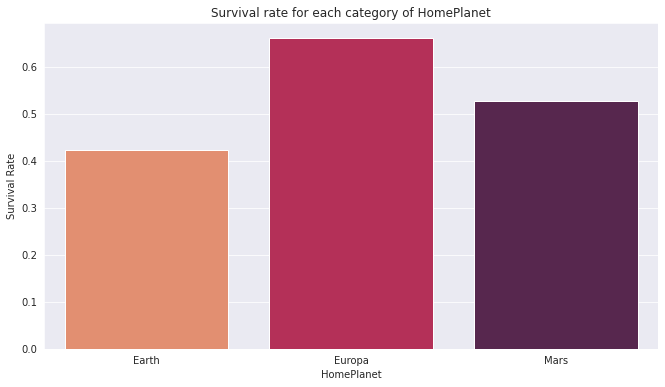

In [52]:
survival_rate_categoric(train_df, "HomePlanet")

We can clearly see that the survival rate varies according to the HomePlanet. Europa has the highest percentage of survivors, more than 60%, followed by Mars with more than 50%.

### CryoSleep

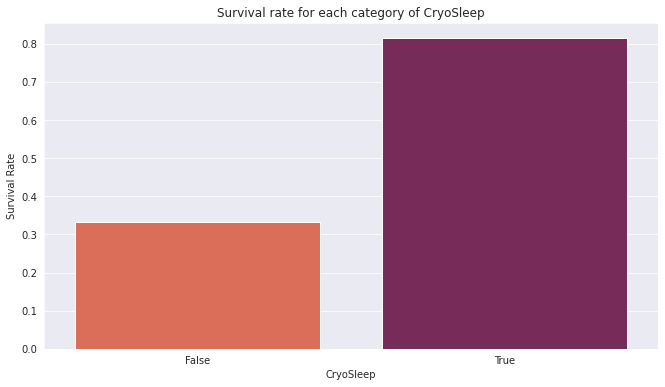

In [53]:
survival_rate_categoric(train_df, "CryoSleep")

It's clear that the passengers who were in CryoSleep had a much higher survival rate, more than two times higher.  

### Destination 

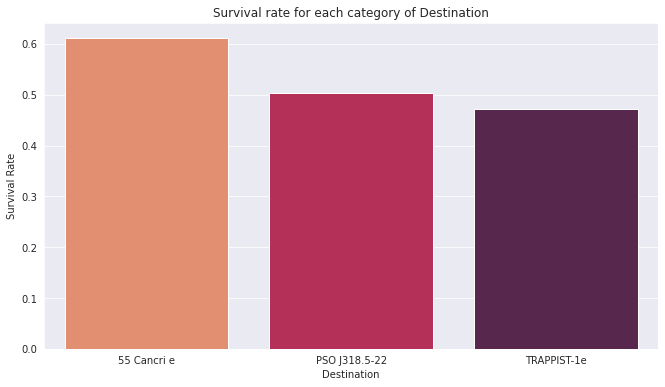

In [54]:
survival_rate_categoric(train_df, "Destination")

### Age

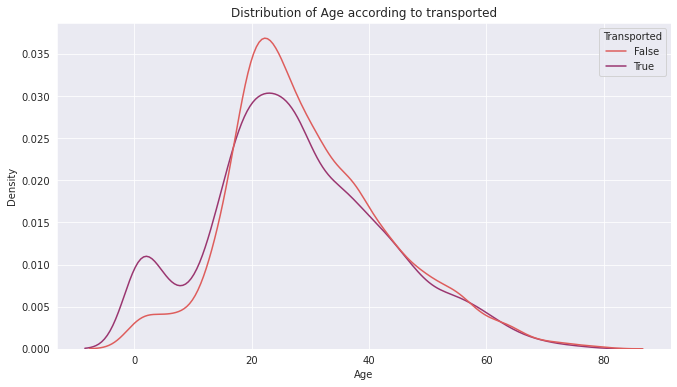

In [56]:
survival_rate_dist_num(train_df, "Age")

We can see that amongst the transported passengers there is a much higher concentration of children (<13 years). However for young adults, there is a higher concentration of them amongst the non transported group. For adults (>40 years) the distribution for both groups is very similar.

### Deck

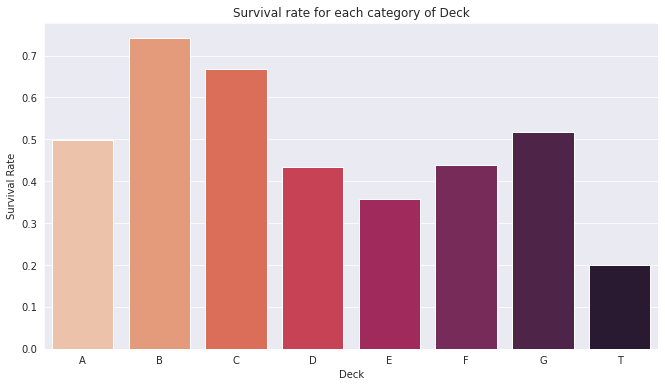

In [59]:
survival_rate_categoric(train_df, "Deck")

### Num

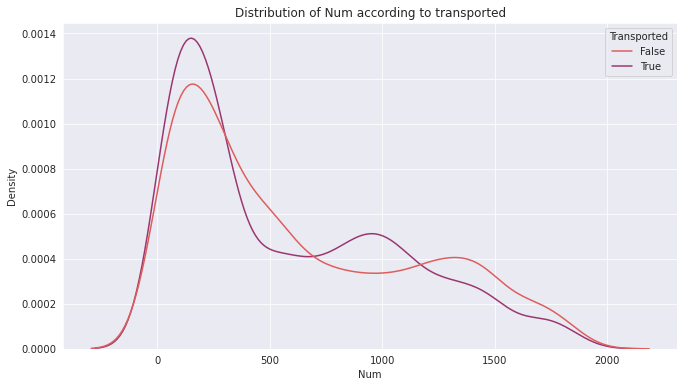

In [60]:
survival_rate_dist_num(train_df, "Num")

We can see that there is no clear behavior of Num according to whether the passenger was transported or not. At first (0<Num<300) there is a higher concentration for non transported passengers, however this behavior changes for 300<Num<700 and for this range there is a higher concentration of passengers that were transported. But this behavior changes again for 700<Num<1200 and the concentration of non transported passengers, is again higher. But finally, for Num>1200, it changes again and the concentration of transported passengers turns back to be greater.

Since every cabin has its own distribution of Num, we'll split this analysis for each cabin:

/home/degelo/anaconda3/envs/kaggle_competition/lib/python3.9/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


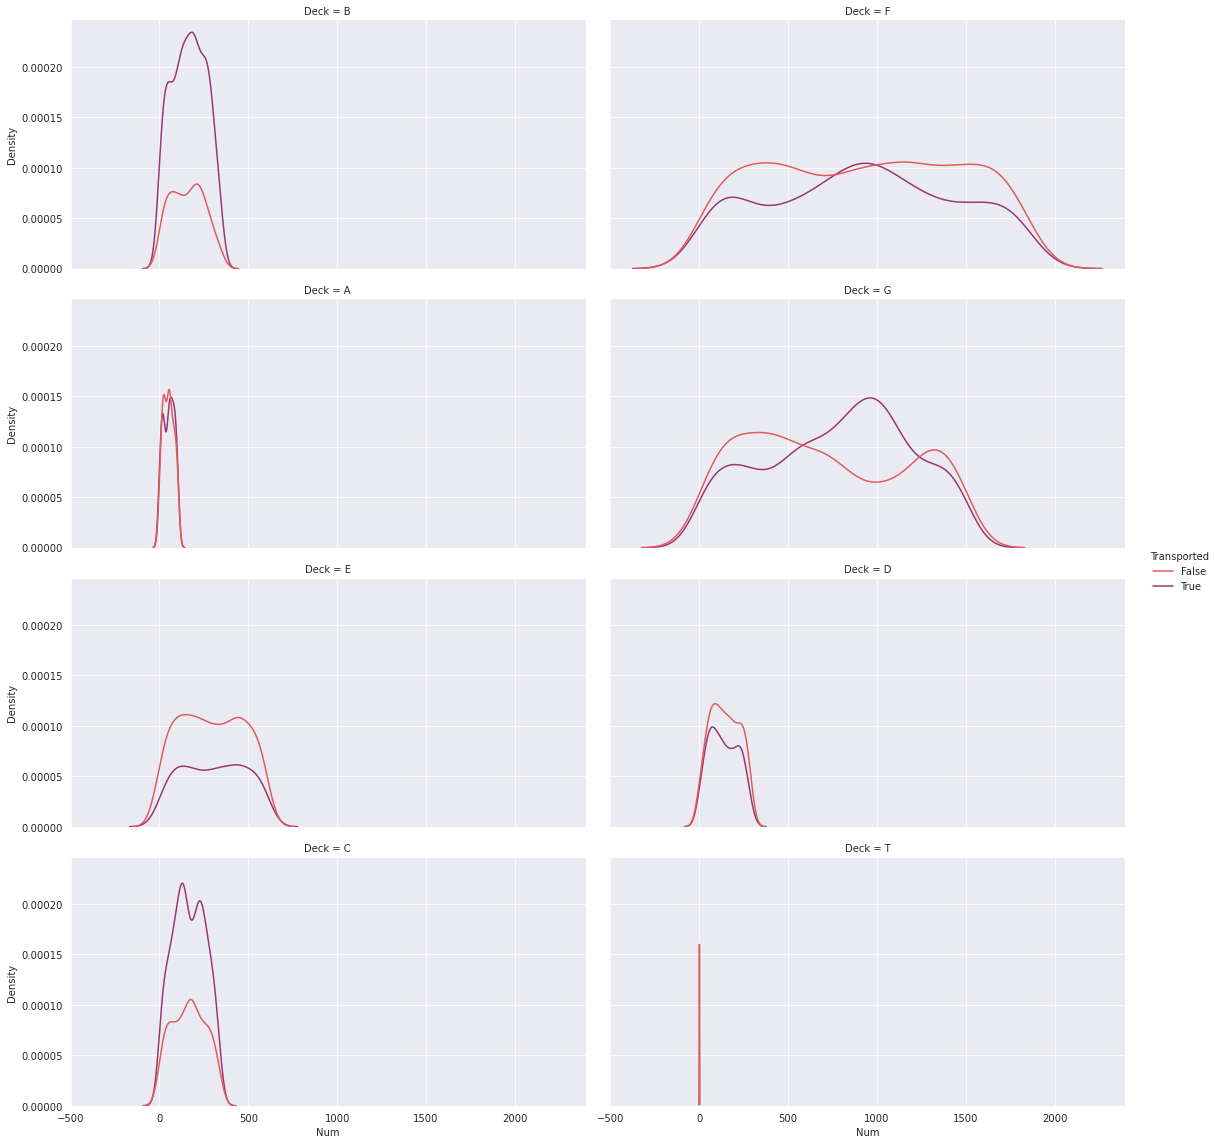

In [87]:
sns.displot(data = train_df, col = "Deck", hue = "Transported", palette="flare", x="Num", 
            kind = "kde", common_norm = "False", aspect = 2., height =4, col_wrap=2)

We can see that for almost every Deck, we can divide it into subgroups so that in each subgroup it has a very clear concentration of transportes or non transported passengers. Dividing into sub groups of 500 might be a good idea. So we will create a new feature in our data set, which indicates the respective group of a passenger. 

In [81]:
train_df["NumGroup"] = (train_df["Num"]/500).apply(int)
train_df["NumGroup"].unique()

array([0, 1, 2, 3])

In [86]:
test_df["NumGroup"] = (test_df["Num"]/500).apply(int)
test_df["NumGroup"].unique()

array([0, 1, 2, 3])

### Side

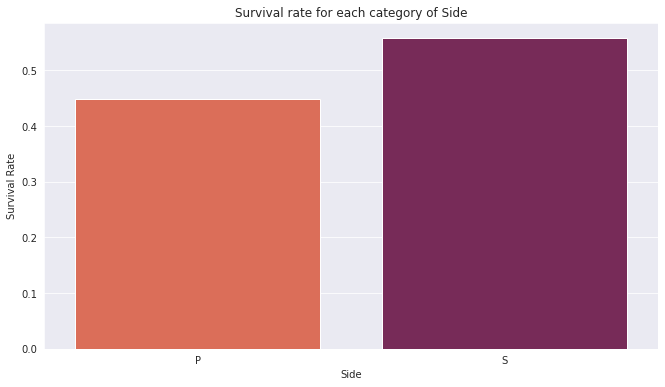

In [83]:
survival_rate_categoric(train_df, "Side")

Passengers from the S side have a higher chance of survival.

### VIP

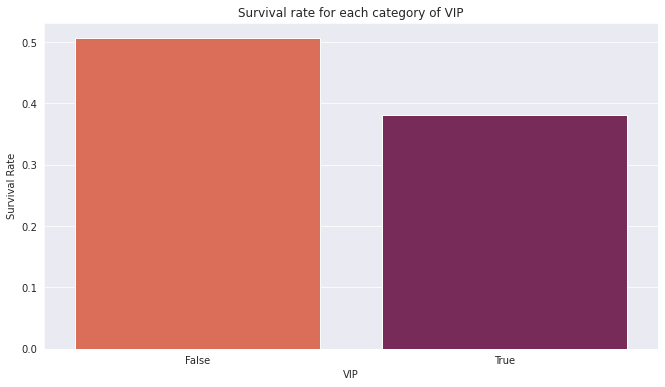

In [84]:
survival_rate_categoric(train_df, "VIP")

VIP passengers have a lower chance of survival, which is counter intuitive.

### Expenses

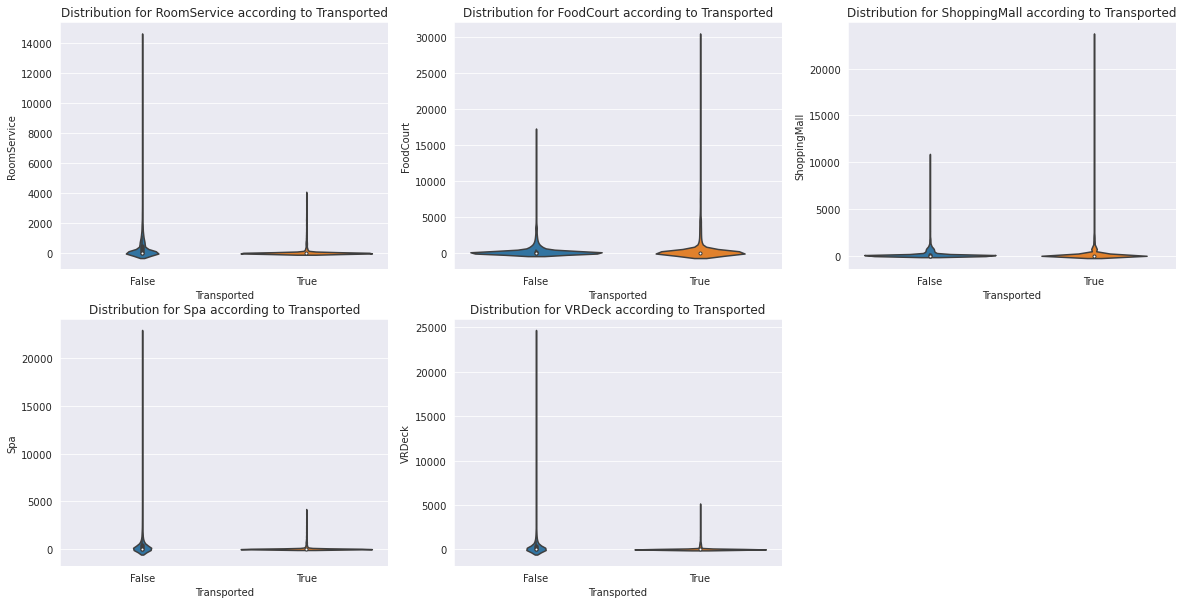

In [98]:
violinplot_expenses(train_df, "Transported")

We can notice that for most expenses, the transported passengers spend less money than the non transported passengers. It might help our model if we create new columns for the total expense of a person.

In [99]:
train_df["TotalExpense"] = train_df["RoomService"] + train_df["FoodCourt"] + train_df["ShoppingMall"] + train_df["Spa"] + train_df["VRDeck"]
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,NumGroup,TotalExpense
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,P,0,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,S,0,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,S,0,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0.0,S,0,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1.0,S,0,1091.0


In [101]:
test_df["TotalExpense"] = test_df["RoomService"] + test_df["FoodCourt"] + test_df["ShoppingMall"] + test_df["Spa"] + test_df["VRDeck"]
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,NumGroup,TotalExpense
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3.0,S,0,0.0
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4.0,S,0,2832.0
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0.0,S,0,0.0
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1.0,S,0,7418.0
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5.0,S,0,645.0


Let's check the distribution of the new column:

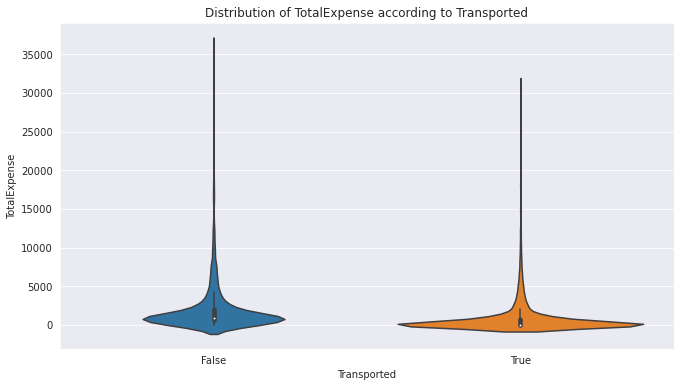

In [100]:
violinplot_num_cat(train_df, "TotalExpense", "Transported")

### PassengerId
One last information we can extract from our data, is wheter the passenger was traveling alone or with a group. We can obtain this information from the PassengerId column

Since some groups might be separated in train and test data, we will use the concatenated dataframe to ger this information 

In [102]:
df["Group"] = df["PassengerId"].str.split("_").str[0]

In [110]:
groups_count = df.groupby("Group")[["PassengerId"]].count()
groups_count.columns = ["Count"]
groups_count[groups_count["Count"]<=1] = False
groups_count[groups_count["Count"]>1] = True 

groups_count.head()

,Count
Group,
0001,False
0002,False
0003,True
0004,False
0005,False


In [114]:
train_df["Group"] = train_df["PassengerId"].str.split("_").str[0]
train_df["InGroup"] = train_df["Group"].apply(lambda x:groups_count.loc[x])
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side,NumGroup,TotalExpense,Group,InGroup
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,P,0,0.0,0001,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0.0,S,0,736.0,0002,False
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,S,0,10383.0,0003,True
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0.0,S,0,5176.0,0003,True
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1.0,S,0,1091.0,0004,False


In [115]:
test_df["Group"] = test_df["PassengerId"].str.split("_").str[0]
test_df["InGroup"] = test_df["Group"].apply(lambda x:groups_count.loc[x])
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side,NumGroup,TotalExpense,Group,InGroup
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3.0,S,0,0.0,0013,False
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4.0,S,0,2832.0,0018,False
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0.0,S,0,0.0,0019,False
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1.0,S,0,7418.0,0021,False
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5.0,S,0,645.0,0023,False


Let's explore the new column:

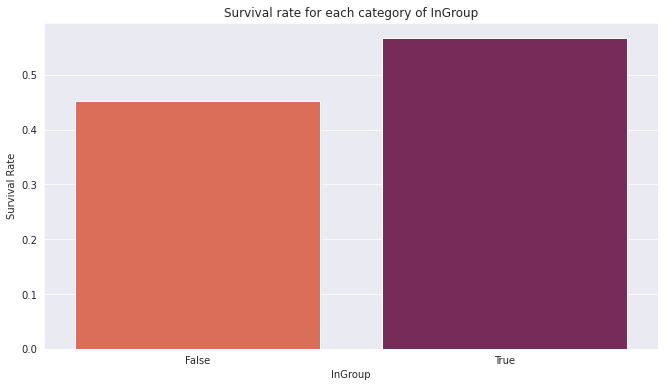

In [116]:
survival_rate_categoric(train_df, "InGroup")

We can see that passengers that traveled in a group have a higher chance of survival.

In [117]:
train_df.to_csv("data/train_clean.csv", index = False)

In [118]:
test_df.to_csv("data/test_clean.csv", index = False)